# Introduction 

In the following notebook, I will preparing the 2020_0505_Cleaned_Weather_Features.csv for time series forecasting

* Raw data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/01_Raw_Data)
* Cleaned data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/02_Cleaned_Data)

**Read in libraries for notebook**

In [32]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

**Set notebook preferences**

In [33]:
#Set preferences for pandas 
pd.set_option("display.max_rows", 101)

#Set style for visualizations
plt.style.use('Solarize_Light2')
font_title = {'fontsize' : 24, 
              'fontweight' : 'semibold',
             'fontname':'Gill Sans MT'}

#Surpress warnings
warnings.filterwarnings('ignore')

**Read in data**

In [34]:
#Set path to raw data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather'

#Read in raw data
df = pd.read_csv(path + '/Data/02_Cleaned_Data/2020_0505_Cleaned_Weather_Features.csv', index_col='date_time')

# Data Overview

**Data Dictionary**

* **date_time**: date and time index localized to CET
* **city_name**: name of city
* **temp**: temperature in Fahrenheit
* **date**: mm/dd/yyyy
* **time**: time of recording
* **weekday**: day of temp recording
* **month**: month of temp recording
* **year**: year of temp recording

**Data Preview**

In [35]:
#Print df shape
print('Shape of data:', df.shape)

#View head
display(df.head())

Shape of data: (178375, 7)


,city_name,temp,date,time,weekday,month,year
date_time,,,,,,,
2015-01-01 00:00:00,Valencia,27.1850,2015-01-01,00:00:00,Thursday,January,2015
2015-01-01 01:00:00,Valencia,27.1850,2015-01-01,01:00:00,Thursday,January,2015
2015-01-01 02:00:00,Valencia,25.7648,2015-01-01,02:00:00,Thursday,January,2015
2015-01-01 03:00:00,Valencia,25.7648,2015-01-01,03:00:00,Thursday,January,2015
2015-01-01 04:00:00,Valencia,25.7648,2015-01-01,04:00:00,Thursday,January,2015


**About the data**

In [36]:
print('Data set stats and info:\n{}\n'.format(df.describe()))
print(df.info())

Data set stats and info:
                temp           year
count  178375.000000  178375.000000
mean       61.643440    2016.508670
std        14.447722       1.117775
min        12.362000    2015.000000
25%        50.936000    2016.000000
50%        60.800000    2017.000000
75%        71.600000    2018.000000
max       108.410000    2018.000000

<class 'pandas.core.frame.DataFrame'>
Index: 178375 entries, 2015-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   city_name  178375 non-null  object 
 1   temp       178375 non-null  float64
 2   date       178375 non-null  object 
 3   time       178375 non-null  object 
 4   weekday    178375 non-null  object 
 5   month      178375 non-null  object 
 6   year       178375 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 10.9+ MB
None


# Feature Engineering

**Drop columns not pertaining to Time Series Analysis**

In [37]:
df = df[['city_name','temp']]

Subset highest and lowest temperatures into their own data frames

In [38]:
#Subset coolest city Bilbao
bilbao = df.loc[df.city_name == 'Bilbao']

#Check
display(bilbao.head())

,city_name,temp
date_time,,
2015-01-01 00:00:00,Bilbao,25.713163
2015-01-01 01:00:00,Bilbao,25.904300
2015-01-01 02:00:00,Bilbao,24.983038
2015-01-01 03:00:00,Bilbao,24.896019
2015-01-01 04:00:00,Bilbao,25.403900


In [39]:
#Subset warmest city Seville
seville = df.loc[df.city_name == 'Seville']

#Check
display(seville.head())

,city_name,temp
date_time,,
2015-01-01 00:00:00,Seville,32.4050
2015-01-01 01:00:00,Seville,32.4050
2015-01-01 02:00:00,Seville,33.6848
2015-01-01 03:00:00,Seville,33.6848
2015-01-01 04:00:00,Seville,33.6848


### Quick EDA(Should be PNG FILES)

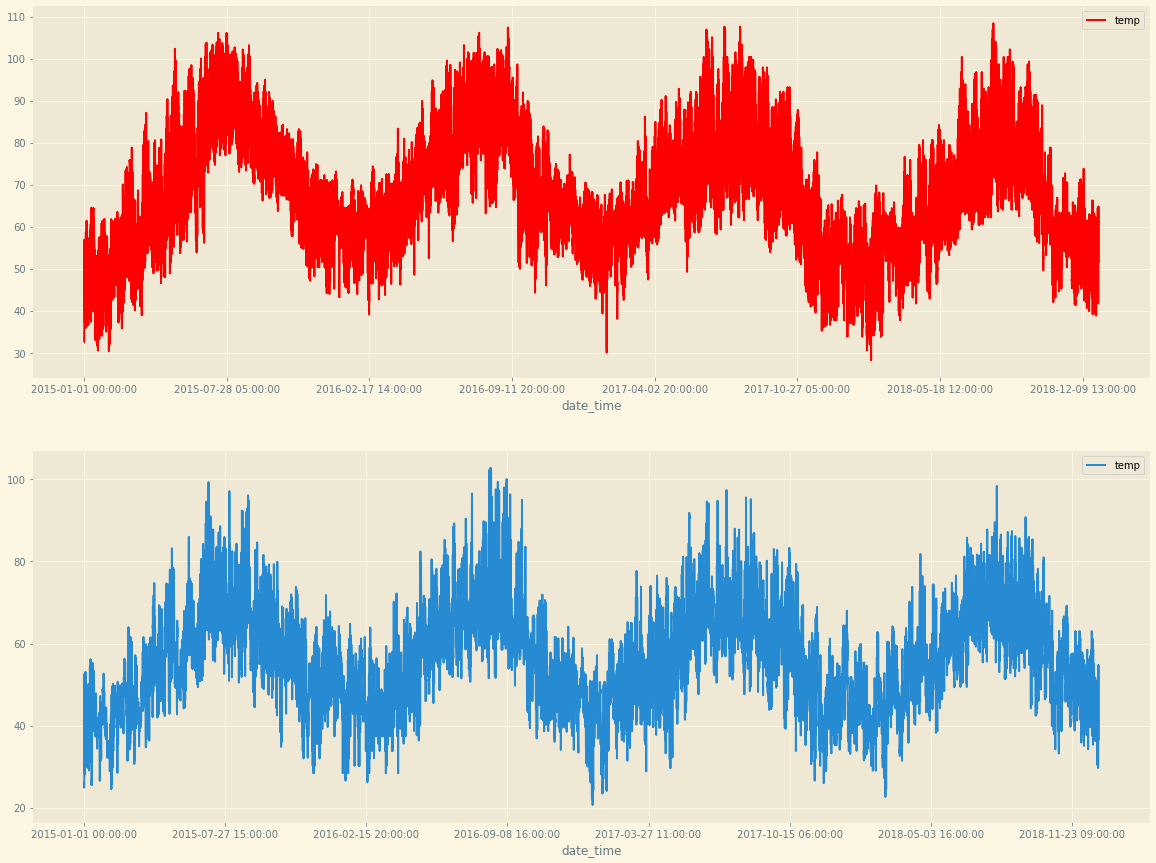

In [40]:
f, ax = plt.subplots(2,1,figsize = (20,15))

seville.plot(ax=ax[0], color = 'r')

bilbao.plot(ax=ax[1])

In [41]:
###Detrend and deseasonalized highest city

#Season = 24hrs for seville
seville['first_deseasoned'] = seville.temp.diff(24)

seville.tail()

,city_name,temp,first_deseasoned
date_time,,,
2018-12-31 19:00:00,Seville,58.298,-1.404
2018-12-31 20:00:00,Seville,54.698,-2.502
2018-12-31 21:00:00,Seville,53.600,0.000
2018-12-31 22:00:00,Seville,51.800,-1.800
2018-12-31 23:00:00,Seville,51.476,-0.324


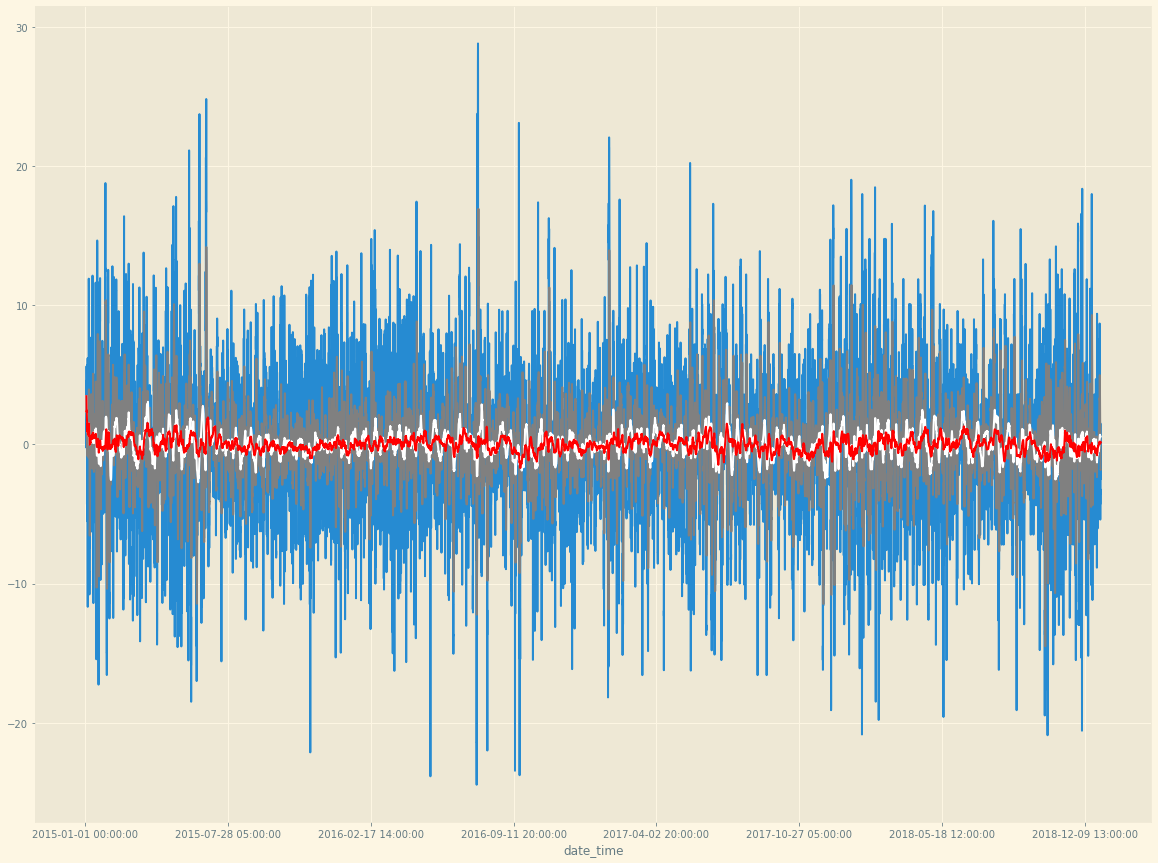

In [50]:
###visualize residuals
f, ax = plt.subplots(figsize = (20,15))

#Plot residuals 
seville.first_deseasoned.plot(ax = ax)
seville.first_deseasoned.rolling(24,12).mean().plot(color = 'grey') #Daily
seville.first_deseasoned.rolling(24*7,12).mean().plot(color = 'white') #weekly
seville.first_deseasoned.rolling(24*7*2,12).mean().plot(color = 'red') #biweekly


#


In [ ]:
###TEST

In [ ]:
###Detrend and deseasonalized highest city

In [ ]:
###visualize residuals

In [ ]:
###TEST